In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import os
import scipy.spatial

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'gender_submission.csv', 'test.csv', 'titanic.ipynb', 'train.csv']


In [3]:
train = pd.read_csv('train.csv', index_col='PassengerId') 
test = pd.read_csv('test.csv', index_col='PassengerId') 
gender_submission = pd.read_csv('gender_submission.csv', index_col='PassengerId')

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
gender_submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [6]:
Survived = train.loc[:, "Survived"]
train_df = train.drop(["Survived"], axis=1).copy()

In [7]:
train_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_index = train_df.index
test_index = test.index

In [9]:
train_index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)

In [10]:
df_all = pd.concat([train_df, test])

In [11]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
def nullAnalysis(df):
    tab_info = pd.DataFrame(df.dtypes).T.rename( index = {0:'Column Type'} )
    tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0:'Null Values (np)'}))
    tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df_all.shape[0]*100).T.rename(index = {0:'Null Values (%)'}))
    return tab_info

In [13]:
nullAnalysis(df_all)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Column Type,int64,object,object,float64,int64,int64,object,float64,object,object
Null Values (np),0,0,0,263,0,0,0,1,1014,2
Null Values (%),0,0,0,20.0917,0,0,0,0.0763942,77.4637,0.152788


In [14]:
df_all[df_all.loc[:,'Age'].isnull()].head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


In [15]:
print("Average age of a passengers: ", round(df_all.loc[:,'Age'].agg('mean'), 0))

Average age of a passengers:  30.0


In [16]:
df_all.groupby('Pclass')['Age'].agg('mean')

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [17]:
#df_all.loc[(df_all['Age'].isnull()) & (df_all['Pclass'] == 1), ['Age']]

In [18]:
df_all.loc[(df_all['Age'].isnull()) & (df_all['Pclass'] == 1), ['Age']] = round(df_all.groupby('Pclass')['Age'].agg('mean')[1], 0)
df_all.loc[(df_all['Age'].isnull()) & (df_all['Pclass'] == 2), ['Age']] = round(df_all.groupby('Pclass')['Age'].agg('mean')[2], 0)
df_all.loc[(df_all['Age'].isnull()) & (df_all['Pclass'] == 3), ['Age']] = round(df_all.groupby('Pclass')['Age'].agg('mean')[3], 0)

In [19]:
df_all[df_all['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [20]:
df_all.groupby('Pclass', as_index=False)['Fare'].agg('mean')

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [21]:
df_all.loc[1044, ['Fare']] = 13.30

In [22]:
print("Count Number Of Cabin With Null Data: ")
df_all.loc[(df_all.loc[:,'Cabin'].isnull() == True)]['Name'].count()

Count Number Of Cabin With Null Data: 


1014

In [23]:
df_all.groupby('Pclass').agg('count')[['Name', 'Cabin']]

,Name,Cabin
Pclass,,
1,323,256
2,277,23
3,709,16


In [24]:
df_all.shape

(1309, 10)

In [25]:
(df_all.groupby('Pclass').agg('count')['Cabin'] / df_all.groupby('Pclass').agg('count')['Name']) * 100 

Pclass
1    79.256966
2     8.303249
3     2.256700
dtype: float64

In [26]:
df_all[df_all['Cabin'].str.contains(' ', regex = False) == True].sort_values(by='Cabin').head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S
1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C


In [27]:
df_cabin_expand = df_all.loc[:, 'Cabin'].str.split(' ', expand = True)

In [28]:
df_cabin_expand.head()

,0,1,2,3
PassengerId,,,,
1,NaN,NaN,NaN,NaN
2,C85,None,None,None
3,NaN,NaN,NaN,NaN
4,C123,None,None,None
5,NaN,NaN,NaN,NaN


In [29]:
df_cabin_expand[df_cabin_expand.loc[:, 1].isnull() == False].groupby([0]).count().head()

,1,2,3
0,,,
B51,3,3,0
B52,1,1,0
B57,5,5,5
B58,3,0,0
B82,1,0,0


In [30]:
df_cabin_expand[df_cabin_expand.loc[:, 2].isnull() == False].groupby([0]).count()

,1,2,3
0,,,
B51,3,3,0
B52,1,1,0
B57,5,5,5
C23,6,6,0


In [31]:
df_cabin_expand[df_cabin_expand.loc[:, 3].isnull() == False].groupby([0]).count()

,1,2,3
0,,,
B57,5,5,5


In [32]:
df_all[df_all['Embarked'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [33]:
df_all['Embarked'] = df_all['Embarked'].fillna(method = 'bfill')

In [34]:
df_all.loc[61:65]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
61,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,S
63,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
64,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S
65,1,"Stewart, Mr. Albert A",male,39.0,0,0,PC 17605,27.7208,NaN,C


In [35]:
df_name_salutations = df_all.loc[:, 'Name'].str.split(' ', expand = True).copy()

In [36]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df_name_salutations.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
PassengerId,,,,,,,,,,,,,,
1,"Braund,",Mr.,Owen,Harris,None,None,None,None,None,None,None,None,None,None
2,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),None,None,None,None,None,None,None
3,"Heikkinen,",Miss.,Laina,None,None,None,None,None,None,None,None,None,None,None
4,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),None,None,None,None,None,None,None
5,"Allen,",Mr.,William,Henry,None,None,None,None,None,None,None,None,None,None


In [38]:
df_name_salutations.groupby(1).count()

,0,2,3,4,5,6,7,8,9,10,11,12,13
1,,,,,,,,,,,,,
"Billiard,",3,3,3,3,0,0,0,0,0,0,0,0,0
"Brito,",1,1,1,1,0,0,0,0,0,0,0,0,0
Capt.,1,1,1,0,0,0,0,0,0,0,0,0,0
"Carlo,",2,2,2,1,1,0,0,0,0,0,0,0,0
Col.,4,4,3,0,0,0,0,0,0,0,0,0,0
"Cruyssen,",1,1,1,0,0,0,0,0,0,0,0,0,0
Don.,1,1,1,0,0,0,0,0,0,0,0,0,0
Dr.,8,8,4,0,0,0,0,0,0,0,0,0,0
"Gordon,",2,2,2,2,2,2,1,0,0,0,0,0,0


In [39]:
df_newsal_1 = df_name_salutations[df_name_salutations[1].str.contains('.', regex=False)][1]
df_newsal_2 = df_name_salutations[df_name_salutations[2].str.contains('.', regex=False)][2]
df_newsal_3 = df_name_salutations[(df_name_salutations[3].isnull() ==False) & (df_name_salutations[3].str.contains('.', regex=False))][3]

In [40]:
df_newsal_2

PassengerId
19           Mrs.
39          Miss.
154           Mr.
201           Mr.
283           Mr.
287           Mr.
334           Mr.
356           Mr.
362           Mr.
420         Miss.
557         Lady.
560          Mrs.
596           Mr.
600          Sir.
753           Mr.
760     Countess.
799           Mr.
800          Mrs.
869           Mr.
874           Mr.
907          Mrs.
911          Mrs.
995           Mr.
1037          Mr.
1084      Master.
1152          Mr.
1228          Mr.
1236      Master.
Name: 2, dtype: object

In [41]:
df_newsal_2 = df_newsal_2.rename(1)
df_newsal_3 = df_newsal_3.rename(1)

In [42]:
df_newsal_2

PassengerId
19           Mrs.
39          Miss.
154           Mr.
201           Mr.
283           Mr.
287           Mr.
334           Mr.
356           Mr.
362           Mr.
420         Miss.
557         Lady.
560          Mrs.
596           Mr.
600          Sir.
753           Mr.
760     Countess.
799           Mr.
800          Mrs.
869           Mr.
874           Mr.
907          Mrs.
911          Mrs.
995           Mr.
1037          Mr.
1084      Master.
1152          Mr.
1228          Mr.
1236      Master.
Name: 1, dtype: object

In [43]:
len(df_newsal_1) + len(df_newsal_2) + len(df_newsal_3)

1309

In [44]:
df_newsal = df_newsal_1.append([df_newsal_2, df_newsal_3])

In [45]:
df_newsal = df_newsal.rename('Salutation')

In [46]:
df_newsal.head()

PassengerId
1      Mr.
2     Mrs.
3    Miss.
4     Mrs.
5      Mr.
Name: Salutation, dtype: object

In [47]:
df_all = pd.concat([df_all, df_newsal], axis=1)

In [48]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [49]:
df_all.groupby('Salutation').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Salutation,,,,,,,,,,
Capt.,1,1,1,1,1,1,1,1,1,1
Col.,4,4,4,4,4,4,4,4,3,4
Countess.,1,1,1,1,1,1,1,1,1,1
Don.,1,1,1,1,1,1,1,1,0,1
Dona.,1,1,1,1,1,1,1,1,1,1
Dr.,8,8,8,8,8,8,8,8,4,8
Jonkheer.,1,1,1,1,1,1,1,1,0,1
Lady.,1,1,1,1,1,1,1,1,1,1
Major.,2,2,2,2,2,2,2,2,2,2


In [50]:
df_all.loc[:,'Family'] = ((df_all['SibSp'] > 0) | (df_all['Parch'] > 0)).replace(True, 1, inplace=False)
df_all.loc[:,'Family'] = df_all.loc[:,'Family'].astype(int)

In [51]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Family
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0


In [52]:
df_familynames = df_all.loc[:,'Name'].str.split(' ', expand=True).copy()

# Families with single last name
l_singleLastname = df_familynames[(df_familynames[0].str.contains(',', regex=False)==True)].index

# Families with double last name
l_doubleLastname = df_familynames[(df_familynames[0].str.contains(',', regex=False)==False) 
                                  & (df_familynames[1].str.contains(',', regex=False)==True)].index

# Families with double last name and more
l_doubleLastnameSpec = df_familynames[(df_familynames[0].str.contains(',', regex=False)==False) 
                                      & (df_familynames[1].str.contains(',', regex=False)==False) 
                                      & (df_familynames[2].str.contains(',', regex=False)==True)].index

In [53]:
df_singleLastname = df_familynames.loc[l_singleLastname,0]
df_doubleLastname = (df_familynames.loc[l_doubleLastname,0] 
                     + ' ' + df_familynames.loc[l_doubleLastname,1])
df_doubleLastnameSpec = (df_familynames.loc[l_doubleLastnameSpec,0] 
                         + ' ' + df_familynames.loc[l_doubleLastnameSpec,1] 
                         + ' ' + df_familynames.loc[l_doubleLastnameSpec,2])

In [54]:
df_singleLastname = df_singleLastname.rename('Lastname')
df_doubleLastname = df_doubleLastname.rename('Lastname')
df_doubleLastnameSpec =  df_doubleLastnameSpec.rename('Lastname')

In [55]:
df_familynames['Lastname'] = df_singleLastname.append([df_doubleLastname, df_doubleLastnameSpec])

In [56]:
df_familynames.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Lastname
PassengerId,,,,,,,,,,,,,,,
1,"Braund,",Mr.,Owen,Harris,None,None,None,None,None,None,None,None,None,None,"Braund,"
2,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),None,None,None,None,None,None,None,"Cumings,"
3,"Heikkinen,",Miss.,Laina,None,None,None,None,None,None,None,None,None,None,None,"Heikkinen,"
4,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),None,None,None,None,None,None,None,"Futrelle,"
5,"Allen,",Mr.,William,Henry,None,None,None,None,None,None,None,None,None,None,"Allen,"


In [57]:
df_lastname_count = df_familynames.groupby('Lastname', as_index=False).count()

In [58]:
df_lastname_count = df_lastname_count.drop([1,2,3,4,5,6,7,8,9,10,11,12,13], axis=1)
df_familynames = df_familynames.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13], axis=1)

In [59]:
df_familynames = df_familynames.join(df_lastname_count.set_index('Lastname'), on='Lastname')

In [60]:
df_familynames = df_familynames.rename(columns = {0: "Number_of_Familymembers"})

In [61]:
df_familynames.head()

,Lastname,Number_of_Familymembers
PassengerId,,
1,"Braund,",2
2,"Cumings,",2
3,"Heikkinen,",1
4,"Futrelle,",2
5,"Allen,",2


In [62]:
df_all = pd.merge(df_all , df_familynames, right_index=True, left_index=True)
# Removing the trailing comma
df_all['Lastname'] = df_all['Lastname'].str.rstrip(',')

In [63]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Family,Lastname,Number_of_Familymembers
PassengerId,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,Braund,2
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,Cumings,2
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,Heikkinen,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1,Futrelle,2
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,Allen,2


In [64]:
df_all.loc[df_all['Family'] == 0,'Number_of_Familymembers'] = 1 

In [65]:
df_all.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Family,Lastname,Number_of_Familymembers
PassengerId,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,Braund,2
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,Cumings,2
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,Heikkinen,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1,Futrelle,2
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,Allen,1


In [66]:
df_all.groupby(['Parch']).agg('count')

,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked,Salutation,Family,Lastname,Number_of_Familymembers
Parch,,,,,,,,,,,,,
0,1002,1002,1002,1002,1002,1002,1002,205,1002,1002,1002,1002,1002
1,170,170,170,170,170,170,170,56,170,170,170,170,170
2,113,113,113,113,113,113,113,29,113,113,113,113,113
3,8,8,8,8,8,8,8,3,8,8,8,8,8
4,6,6,6,6,6,6,6,2,6,6,6,6,6
5,6,6,6,6,6,6,6,0,6,6,6,6,6
6,2,2,2,2,2,2,2,0,2,2,2,2,2
9,2,2,2,2,2,2,2,0,2,2,2,2,2


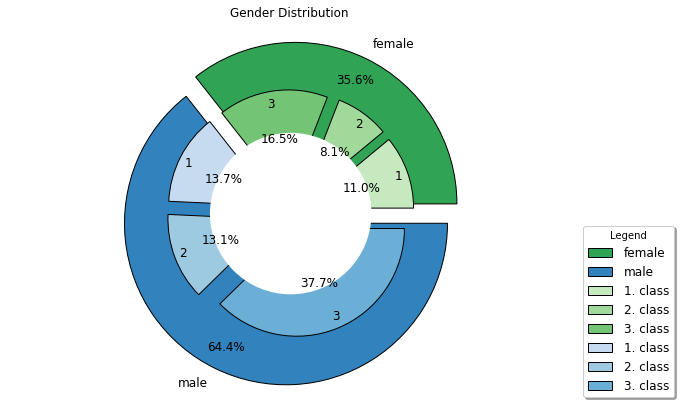

In [67]:
fig, ax = plt.subplots(figsize=(10,7))

size_out = 3
size_in = 1
explode_out = (0.2, 0.2)
explode_in = (0.3, 0.3, 0.3, 0.3, 0.3, 0.3)

cmap = plt.get_cmap('tab20c')

outer_color = cmap(np.array([8, 0]))
inner_color = cmap(np.array([11, 10, 9, 3, 2, 1]))

patches1, texts1, autotexts1 = ax.pie(df_all.groupby(['Sex']).count().Name, radius=3, colors=outer_color,\
                                     labels = df_all.groupby(['Sex']).count().Name.index, autopct = '%1.1f%%',\
                                     pctdistance = 0.85, wedgeprops = dict(width=size_out, edgecolor='black'),\
                                     explode = explode_out)

patches2, texts2, autotexts2 = ax.pie(df_all.groupby(['Sex','Pclass']).count().Name, radius=2, colors=inner_color,\
                                     labels = [1, 2, 3, 1, 2, 3], autopct = '%1.1f%%',\
                                     labeldistance = 0.88, pctdistance=0.55, wedgeprops = dict(width=size_in, edgecolor='black'),\
                                     explode = explode_in)

center_circle = plt.Circle((0, 0), 1.5, color = 'black', fc = 'white', linewidth = 0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

for t in texts1:
    t.set_size('large')
    
for t in autotexts1:
    t.set_size('large')
    
    
for t in texts2:
    t.set_size('large')
    
for t in autotexts2:
    t.set_size('large')
    
ax.legend(loc = 'lower right', bbox_to_anchor = (0.7, 0., 0.5, 0.5), shadow = 1, title ='Legend',\
         handletextpad = 1, labelspacing = 0.5, fontsize ='12', labels = \
         ['female','male','1. class','2. class', '3. class','1. class','2. class', '3. class'])

ax.set(aspect="equal", title = "Gender Distribution")
plt.axis('equal')
plt.show()

In [68]:
df_firstclass_ages = df_all[df_all.loc[:, 'Pclass'] == 1]['Age'].copy()
df_secondclass_ages = df_all[df_all.loc[:, 'Pclass'] == 2]['Age'].copy()
df_thirdclass_ages = df_all[df_all.loc[:, 'Pclass'] == 3]['Age'].copy()

In [69]:
df_all_class_ages = [df_firstclass_ages.values, df_secondclass_ages.values,\
                     df_thirdclass_ages.values]

In [70]:
#df_all_class_ages

In [71]:
font = {'color': 'black', 'weight': 'normal', 'size': 18, }

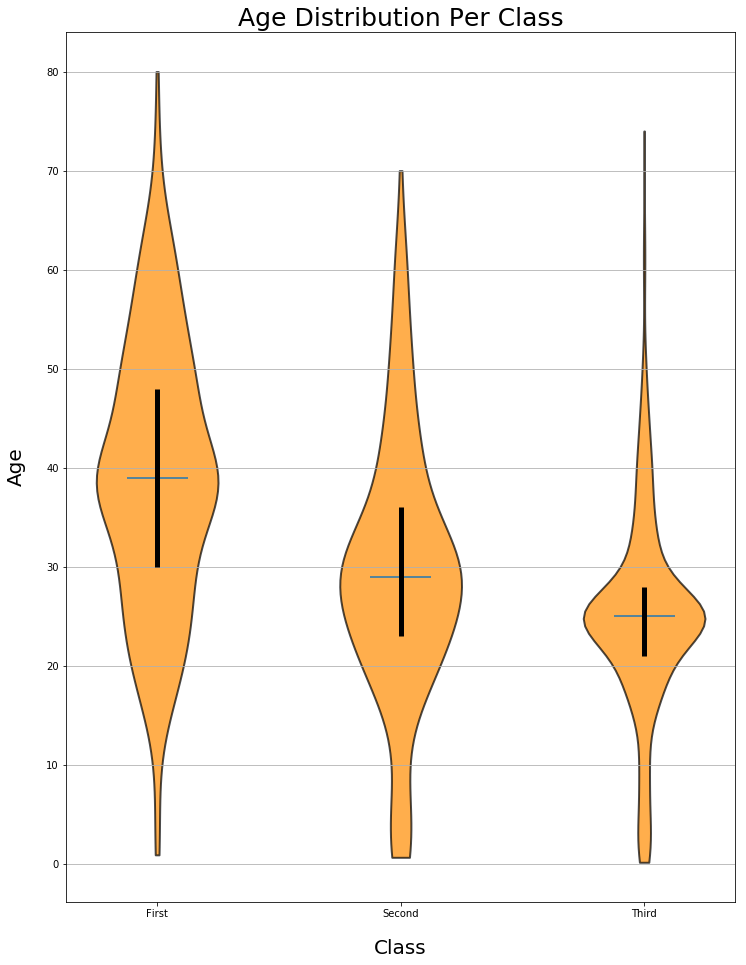

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 16))
parts = axes.violinplot(df_all_class_ages, showextrema=False,\
                       showmedians= True)
axes.set_title('Age Distribution Per Class', fontdict=font, fontsize =25)

for pc in parts['bodies']:
    pc.set_facecolor('#FF8C00')
    pc.set_edgecolor('#000000')
    pc.set_linewidth(2)
    pc.set_alpha(0.7)

axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(df_all_class_ages))])
axes.set_xlabel('Class', fontdict=font, labelpad=20, size=20)
axes.set_ylabel('Age', fontdict=font, labelpad=20, size=20)


axes.vlines(1, df_firstclass_ages.describe()['25%'], df_firstclass_ages.describe()['75%'],\
            color=['#000000'], linestyle='-', lw=5)
axes.vlines(2, df_secondclass_ages.describe()['25%'], df_secondclass_ages.describe()['75%'],\
            color=['#000000'], linestyle='-', lw=5)
axes.vlines(3, df_thirdclass_ages.describe()['25%'], df_thirdclass_ages.describe()['75%'],\
            color=['#000000'], linestyle='-', lw=5)

plt.setp(axes, xticks = [y+1 for y in range(len(df_all_class_ages))],\
        xticklabels=['First', 'Second','Third'])
plt.show()

In [73]:
df_sal_distr = df_all.groupby('Salutation').count()
df_sal_distr.reset_index(level=0, inplace=True)
df_sal_distr = df_sal_distr[['Salutation','Pclass']]
df_sal_distr = df_sal_distr.rename(columns= {'Pclass':"Salutation_Count"})
df_sal_distr

,Salutation,Salutation_Count
0,Capt.,1
1,Col.,4
2,Countess.,1
3,Don.,1
4,Dona.,1
5,Dr.,8
6,Jonkheer.,1
7,Lady.,1
8,Major.,2
9,Master.,61


In [74]:
df_survivalinfo = pd.concat([df_all.loc[train_index, :], Survived], axis=1)

In [75]:
df_survivalinfo.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Family,Lastname,Number_of_Familymembers,Survived
PassengerId,,,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,Braund,2,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,Cumings,2,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,Heikkinen,1,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,1,Futrelle,2,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,Allen,1,0


In [76]:
gp_survived_gender = df_survivalinfo.groupby(['Survived','Sex'])['Name'].count()[1]
gp_gender_survived = df_survivalinfo.groupby(['Sex','Survived'])['Name'].count()
gp_survived_yn = df_survivalinfo.groupby(['Survived']).agg('count')['Name']
gp_survival_total = df_survivalinfo.groupby(['Sex', 'Survived']).count().xs('Name', axis=1)

In [77]:
sizes_suvinf = [gp_survived_yn[y] for y in range(len(gp_survived_yn))]
explode_suvinf = (0, 0.1)

In [78]:
labels_sexinf = [gp_survived_gender.index[y] for y in range(len(gp_survived_gender.index))]
sizes_sexinf = [gp_survived_gender[y] for y in range(len(gp_survived_gender))]
explode_sexinf = (0, 0.1)

In [79]:
labels_maleinf = [gp_gender_survived['male'].index[y] for y in range(len(gp_gender_survived['male'].index))]
sizes_maleinf = [gp_gender_survived['male'][y] for y in range(len(gp_gender_survived['male']))]
explode_maleinf = (0, 0.1)

In [80]:
labels_femaleinf = [gp_gender_survived['female'].index[y] for y in range(len(gp_gender_survived['female'].index))]
sizes_femaleinf = [gp_gender_survived['female'][y] for y in range(len(gp_gender_survived['female']))]
explode_femaleinf = (0, 0.1) 

In [81]:
labels_totalsuvinf = [gp_survival_total.index[y] for y in range(len(gp_gender_survived.index))]
sizes_totalsuvinf = [gp_survival_total[y] for y in range(len(gp_survival_total))]
explode_totalsuvinf = (0.3, 0.0, 0.1, 0.0)

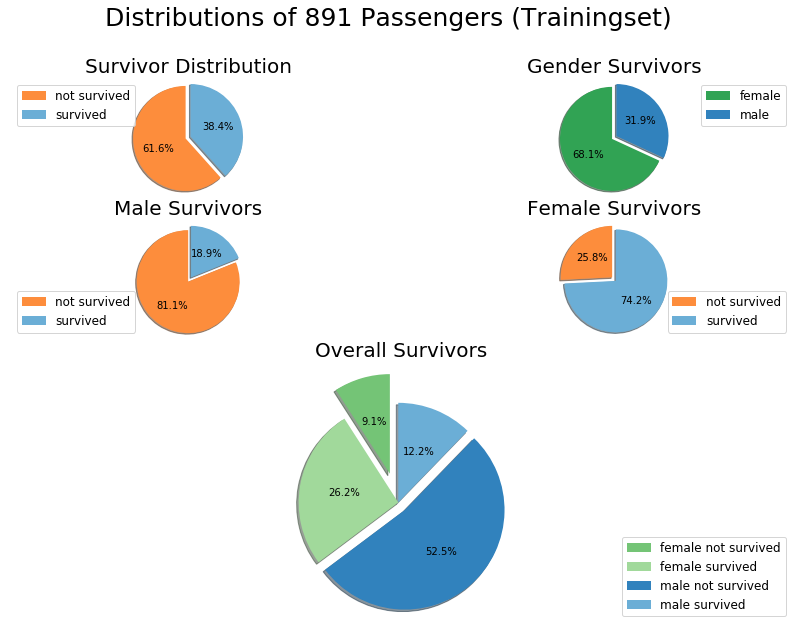

In [82]:
font = {'color':  'black',
        'weight': 'normal',
        #'size': 15,
        'fontsize':15
}
cmap = plt.get_cmap('tab20c')
survivedcolor = cmap(np.array([5,1]))
survivorallcolor = cmap(np.array([9,10,0,1]))

gridsize = (4,2)
fig1 = plt.figure(figsize=(14,10))
ax1 = plt.subplot2grid(gridsize, (0,0))
ax2 = plt.subplot2grid(gridsize, (0,1))
ax3 = plt.subplot2grid(gridsize, (1,0))
ax4 = plt.subplot2grid(gridsize, (1,1))
ax5 = plt.subplot2grid(gridsize, (2,0), colspan= 2, rowspan= 2)

fig1.suptitle('Distributions of 891 Passengers (Trainingset)', fontsize=25)

ax1.pie(sizes_suvinf, 
        explode=explode_suvinf,
        #labels=labels_suvinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55
       )
ax1.axis('equal')

ax1.legend(loc='upper left',fontsize='12',labels=('not survived', 'survived'))
ax1.set_title('Survivor Distribution', fontdict=font, fontsize=20)


ax2.pie(sizes_sexinf, 
        explode=explode_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=outer_color,
        labeldistance=1.15,
        pctdistance=0.55)
ax2.axis('equal')  
ax2.legend(loc='upper right', fontsize='12', labels=labels_sexinf )
ax2.set_title('Gender Survivors', fontdict=font, fontsize=20)

ax3.pie(sizes_maleinf, 
        explode=explode_maleinf,
        #labels=labels_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55)
#ax3.fontdict=font
ax3.legend(loc='lower left', fontsize='12', labels=['not survived','survived'] )
ax3.set_title('Male Survivors', fontdict=font, fontsize=20)
ax3.axis('equal')

ax4.pie(sizes_femaleinf, 
        explode=explode_femaleinf,
        #labels=labels_sexinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivedcolor,
        labeldistance=1.15,
        pctdistance=0.55)
#ax4.fontdict=font
ax4.legend(loc='lower right', fontsize='12', labels=['not survived','survived'] )
ax4.set_title('Female Survivors', fontdict=font, fontsize=20)
ax4.axis('equal') 

ax5.pie(sizes_totalsuvinf, 
        explode=explode_totalsuvinf,
        #labels=labels_totalsuvinf,
        autopct='%1.1f%%',
        shadow=True, startangle=90,
        colors=survivorallcolor,
        labeldistance=1.15,
        pctdistance=0.55)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax4.fontdict=font
ax5.legend(loc='lower right', fontsize='12', labels=['female not survived','female survived','male not survived','male survived'] )
ax5.set_title('Overall Survivors', fontdict=font, fontsize=20)
ax5.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

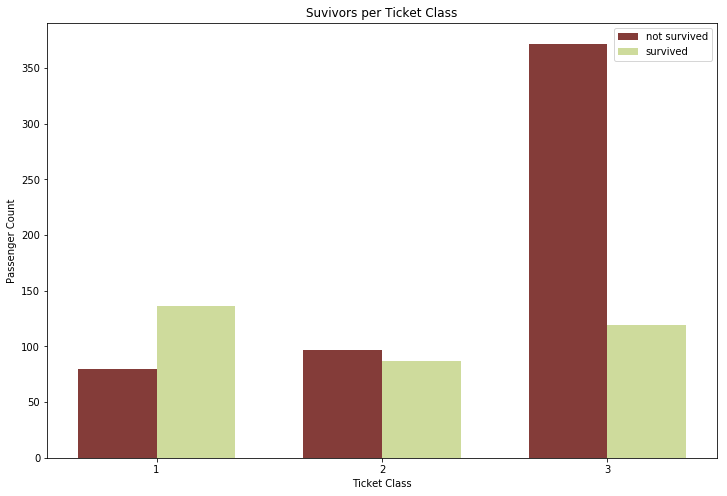

In [83]:
gp_survpclass = df_survivalinfo.groupby(['Survived','Pclass'])['Name'].count()
gridsize = (1,2)
fig1 = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=1)
bar_width = 0.35
cmap = plt.get_cmap('tab20b')
survbarcol = cmap(np.array([7]))
nsurvbarcol = cmap(np.array([12]))
barindex = gp_survpclass[0].index
xtickslables = [barindex[y] for y in range(len(gp_survpclass[0].index))]
ax1.bar(barindex
        ,gp_survpclass[0].values
        ,bar_width
        ,color=nsurvbarcol
        )

ax1.bar(barindex + bar_width
        ,gp_survpclass[1].values
        ,bar_width
        ,color=survbarcol)

ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Passenger Count')
ax1.set_title('Suvivors per Ticket Class')
ax1.set_xticks(barindex + bar_width / 2)
ax1.set_xticklabels(xtickslables)
ax1.legend(labels=('not survived','survived'))

fig.tight_layout()
plt.show()

In [84]:
ptbl = pd.DataFrame.pivot_table(df_survivalinfo, values=['Fare', 'Survived'], index=['Pclass'],
                     aggfunc={'Survived': ['sum'], 'Fare': [min,max,np.mean]})

ptbl

Fare                 Survived
             max       mean  min      sum
Pclass                                   
1       512.3292  84.154687  0.0      136
2        73.5000  20.662183  0.0       87
3        69.5500  13.675550  0.0      119

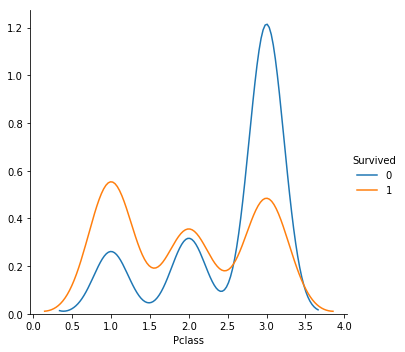

In [85]:
sns.FacetGrid(df_survivalinfo.loc[:,['Survived','Pclass']], hue="Survived", height=5).map(sns.kdeplot, "Pclass").add_legend()
plt.show()

In [86]:
df_survival_sal = df_survivalinfo.groupby(['Salutation','Survived'], as_index=False)['Name'].count()
df_survival_sal = df_survival_sal.rename(columns={"Name": "Total"})
df_survival_sal_total = df_survival_sal.groupby('Salutation', as_index=False)['Total'].agg(sum)

In [87]:
df_survival_sal_nsuv = pd.DataFrame(df_survival_sal[df_survival_sal['Survived'] == 0])
df_survival_sal_nsuv = df_survival_sal_nsuv.rename(columns={'Total':'Total_notSurvived'})
df_survival_sal_nsuv = df_survival_sal_nsuv[['Salutation','Total_notSurvived']]

In [88]:
df_survival_sal_suv = pd.DataFrame(df_survival_sal[df_survival_sal['Survived'] == 1])
df_survival_sal_suv = df_survival_sal_suv.rename(columns={'Total':'Total_Survived'})
df_survival_sal_suv = df_survival_sal_suv[['Salutation','Total_Survived']]

In [89]:
df_survival_sal_total = df_survival_sal_total.join(df_survival_sal_suv.set_index('Salutation'), on='Salutation', how='outer')
df_survival_sal_total = df_survival_sal_total.join(df_survival_sal_nsuv.set_index('Salutation'), on='Salutation', how='outer')

In [90]:
df_survival_sal_total = df_survival_sal_total.fillna(value=0)

df_survival_sal_total

,Salutation,Total,Total_Survived,Total_notSurvived
0,Capt.,1,0.0,1.0
1,Col.,2,1.0,1.0
2,Countess.,1,1.0,0.0
3,Don.,1,0.0,1.0
4,Dr.,7,3.0,4.0
5,Jonkheer.,1,0.0,1.0
6,Lady.,1,1.0,0.0
7,Major.,2,1.0,1.0
8,Master.,40,23.0,17.0
9,Miss.,182,127.0,55.0


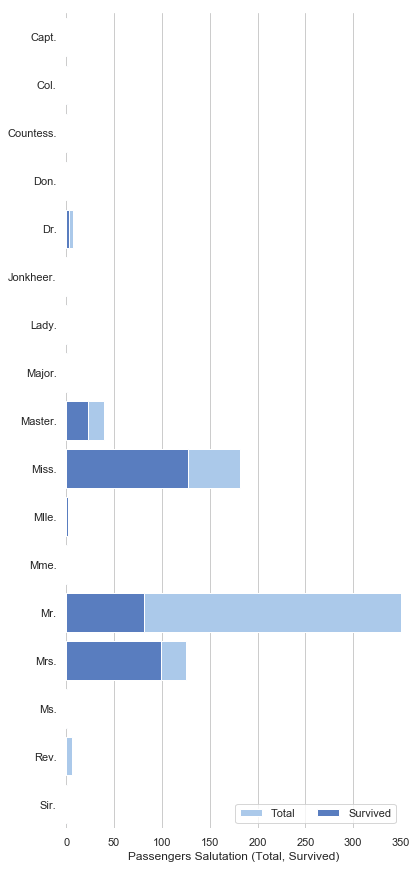

In [91]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
salutations = df_survival_sal_total
sns.set_color_codes("pastel")

sns.barplot(x="Total", y="Salutation", data=salutations,
            label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Total_Survived", y="Salutation", data=salutations,
            label="Survived", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 350), ylabel="",
       xlabel="Passengers Salutation (Total, Survived)")

sns.despine(left=True, bottom=True)

In [92]:
N = 9
# Group seperation by Survived Not-Survived
g_sur_Familymembers = df_survivalinfo[df_survivalinfo.loc[:,'Survived'] == 1].groupby('Number_of_Familymembers').count().Survived
g_nsur_Familymembers = df_survivalinfo[df_survivalinfo.loc[:,'Survived'] == 0].groupby('Number_of_Familymembers').count().Survived

In [93]:
sur_Std = g_sur_Familymembers.std(axis=0) 
sur_Mean = g_sur_Familymembers.mean(axis=0) 

In [94]:
nsur_Std = g_nsur_Familymembers.std(axis=0) 
nsur_Mean = g_nsur_Familymembers.mean(axis=0) 

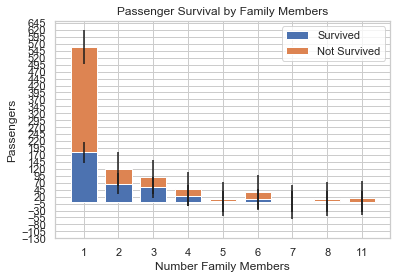

In [95]:
ind  = np.arange(N)
width = 0.75       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, g_sur_Familymembers, width, yerr=sur_Mean)
p2 = plt.bar(ind, g_nsur_Familymembers, width,
             bottom=g_sur_Familymembers, yerr=nsur_Mean)
plt.ylabel('Passengers')
plt.xlabel('Number Family Members')
plt.title('Passenger Survival by Family Members')

plt.xticks(ind, ('1', '2', '3', '4', '5', '6', '7', '8', '11'))
plt.yticks(np.arange(-130, 670, 25))
plt.legend((p1[0], p2[0]), ('Survived', 'Not Survived'))

plt.show()

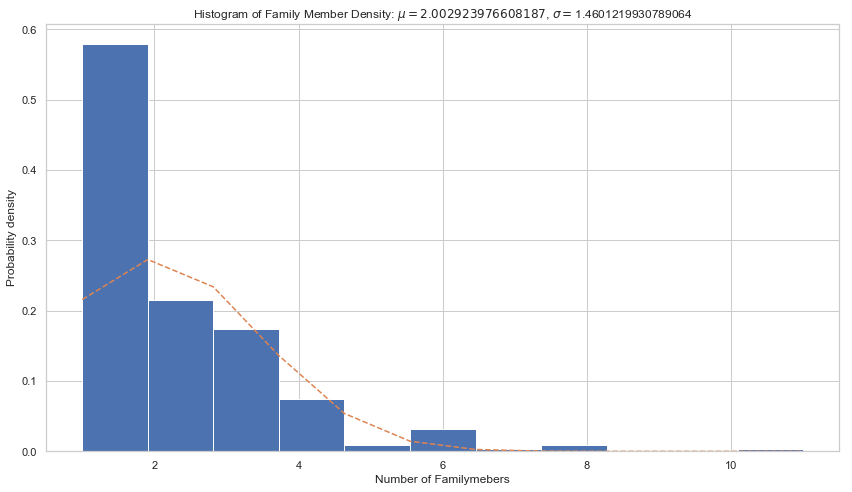

In [96]:
fammem_survived = df_survivalinfo['Number_of_Familymembers']
inputfeature = df_survivalinfo[df_survivalinfo['Survived'] == 1 ]['Number_of_Familymembers']
df_survivalinfo[df_survivalinfo['Survived'] == 1 ]
mu = inputfeature.describe()['mean']
sigma = inputfeature.describe()['std']
x = mu + sigma * inputfeature.values
num_bins = 11
fig, ax = plt.subplots(figsize=(12,7))
n, bins, patches = ax.hist(inputfeature,num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Number of Familymebers')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Family Member Density: $\mu='+ str(mu) +'$, $\sigma= $'+  str(sigma))
fig.tight_layout()
plt.show()

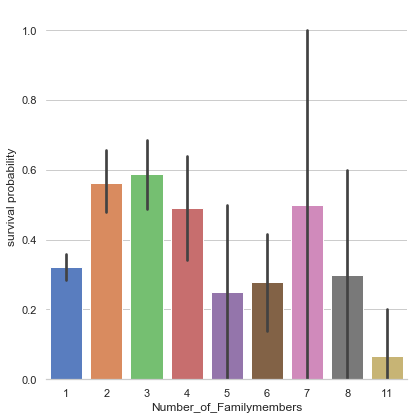

In [97]:
sns.set(style="whitegrid")
g = sns.catplot(x="Number_of_Familymembers", y="Survived", data=df_survivalinfo,
                #x="Pclass", y="Survived", hue='Number_of_Familymembers', data=df_survivalinfo,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [98]:
fare_survived = df_survivalinfo[df_survivalinfo['Survived'] == 1]['Fare']

In [99]:
inputfeature = fare_survived

In [100]:
mu = inputfeature.describe()['mean'] 
sigma = inputfeature.describe()['std']  # standard deviation of distribution
x = mu + sigma * inputfeature.values
num_bins = 50


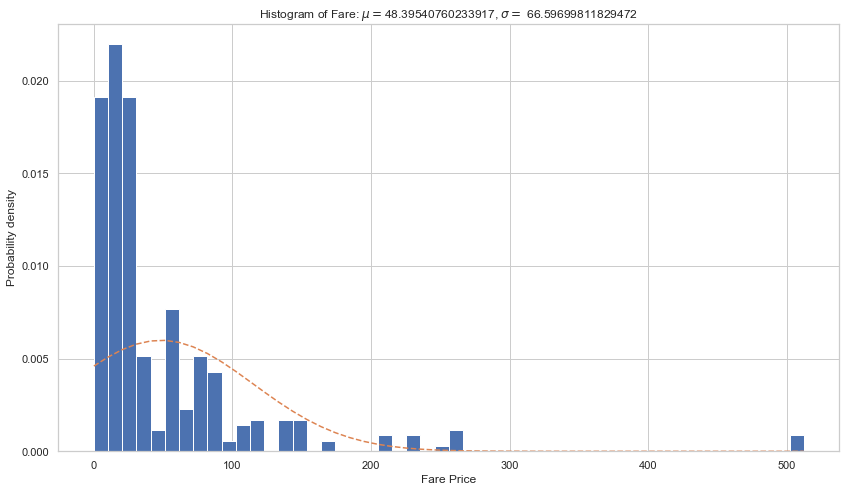

In [101]:
fig, ax = plt.subplots(figsize=(12,7))
n, bins, patches = ax.hist(inputfeature,num_bins, density=1)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Fare Price')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Fare: $\mu=$'+ str(mu) +', $\sigma=$ ' + str(sigma))

fig.tight_layout()
plt.show()

In [102]:
ptbl_survived = pd.DataFrame.pivot_table(df_survivalinfo, values=['Fare', 'Age', 'Survived'], index=['Sex', 'Pclass'],
                     aggfunc={'Fare': np.mean,'Age': [min, max, np.mean], 'Survived': ['sum']})
ptbl_survived

Age                         Fare Survived
                max       mean   min        mean      sum
Sex    Pclass                                            
female 1       63.0  35.031915  2.00  106.125798       91
       2       57.0  28.756579  2.00   21.970121       70
       3       63.0  22.697917  0.75   16.118810       72
male   1       80.0  40.888689  0.92   67.226127       45
       2       70.0  30.678981  0.67   19.741782       17
       3       74.0  26.099193  0.42   12.661633       47

C:\Users\taimu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\taimu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


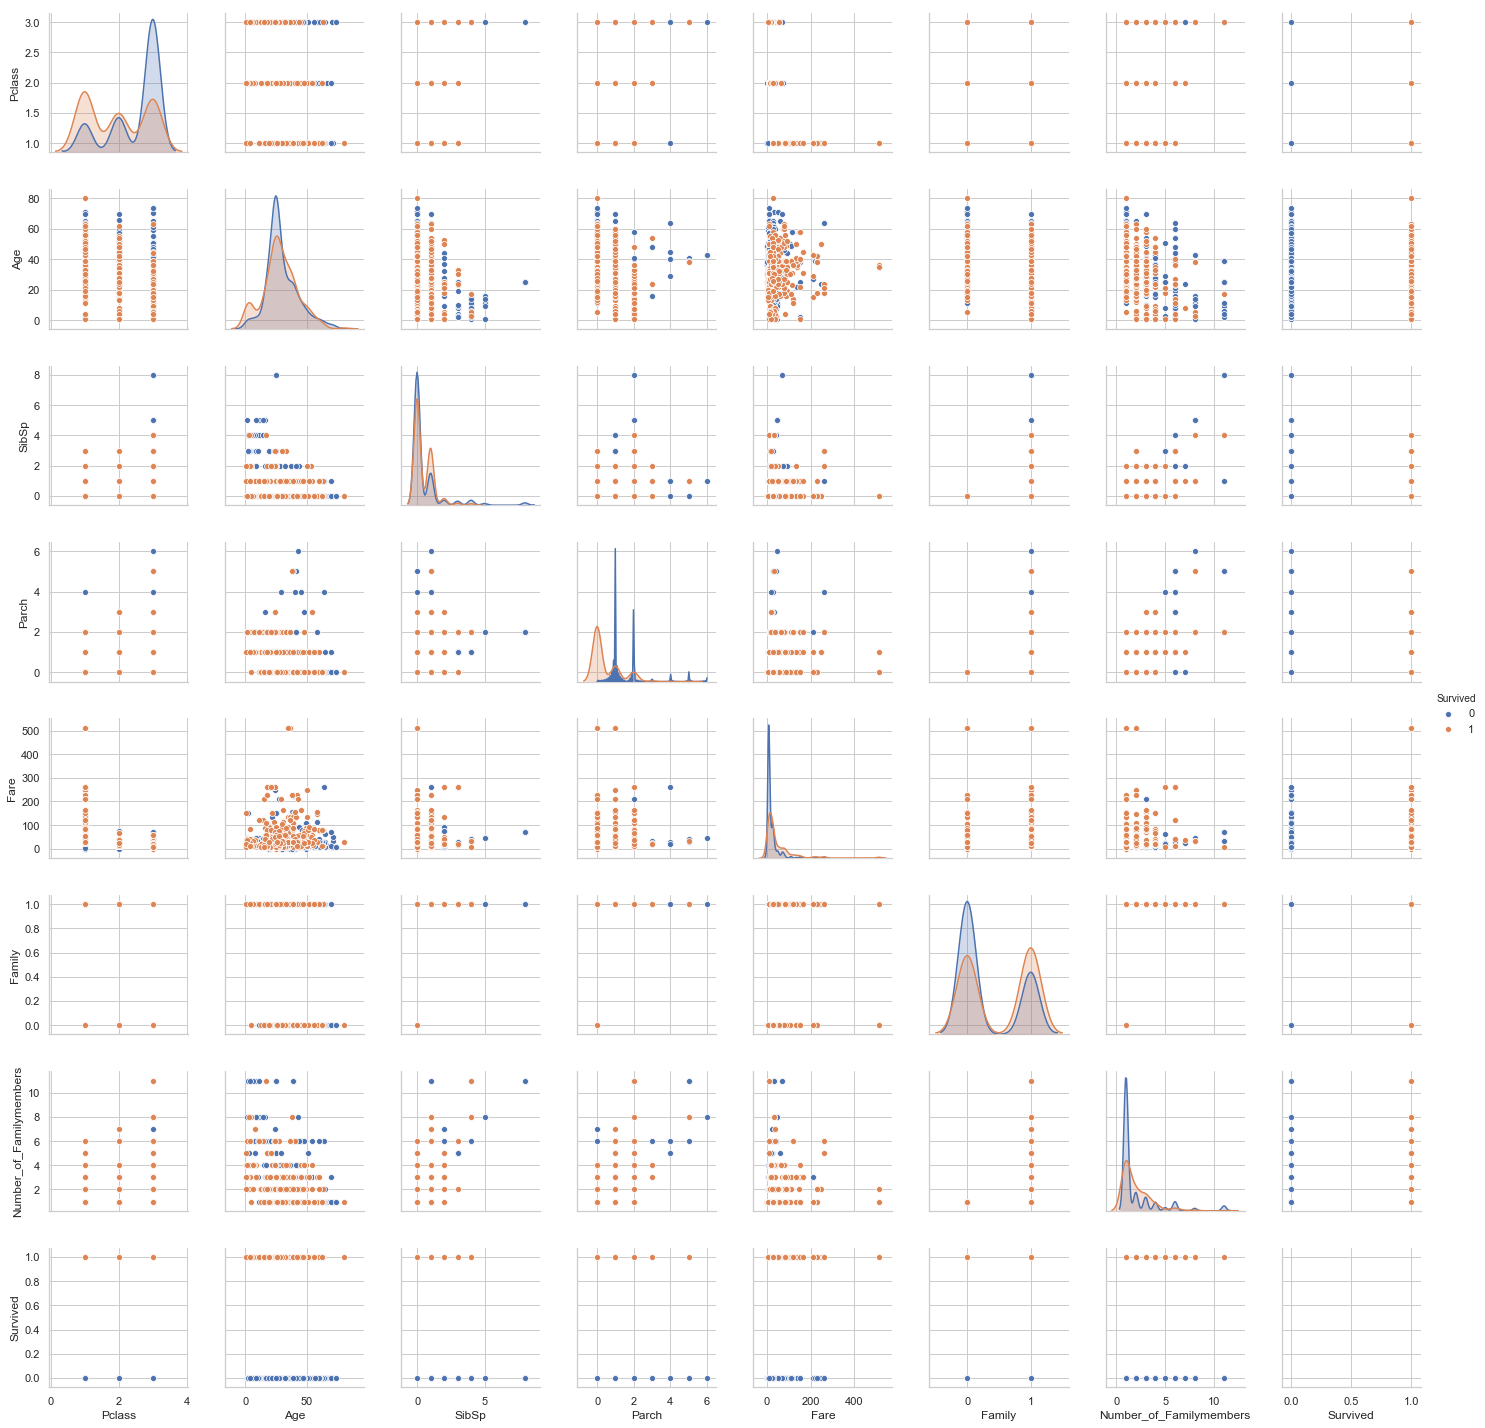

In [103]:
sns.pairplot(df_survivalinfo, hue='Survived')

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [105]:
df_all_knn_hot = df_all.copy()
df_all_knn_hot = df_all_knn_hot.drop(['Name','Cabin','Fare','Ticket','Lastname'], axis=1)
df_all_knn_hot.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Salutation,Family,Number_of_Familymembers
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,S,Mr.,1,2
2,1,female,38.0,1,0,C,Mrs.,1,2
3,3,female,26.0,0,0,S,Miss.,0,1
4,1,female,35.0,1,0,S,Mrs.,1,2
5,3,male,35.0,0,0,S,Mr.,0,1


In [106]:
df_all_knn_hot = pd.get_dummies(df_all_knn_hot, columns=['Sex','Salutation','Embarked'])
df_all_knn_hot.head()

,Pclass,Age,SibSp,Parch,Family,Number_of_Familymembers,Sex_female,Sex_male,Salutation_Capt.,Salutation_Col.,...,Salutation_Mlle.,Salutation_Mme.,Salutation_Mr.,Salutation_Mrs.,Salutation_Ms.,Salutation_Rev.,Salutation_Sir.,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,1,2,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,38.0,1,0,1,2,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,3,26.0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,35.0,1,0,1,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,3,35.0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_all_knn_hot.loc[train_index,:], 
                                                    Survived, test_size = 0.30, random_state = 45)

In [108]:
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(myList)


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 5


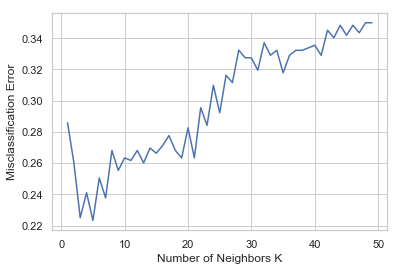

In [109]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [110]:
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



X_train = X_train
y_train = y_train

# 3 Neighbors used from the misclassification error calculation
KNNC = KNeighborsClassifier(n_neighbors=3)
KNNC.fit(X_train, y_train)

y_pred = KNNC.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred, target_names=['0','1']))


print ("Models accuracy score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       178
           1       0.76      0.72      0.74        90

   micro avg       0.83      0.83      0.83       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268

Models accuracy score:  0.8283582089552238


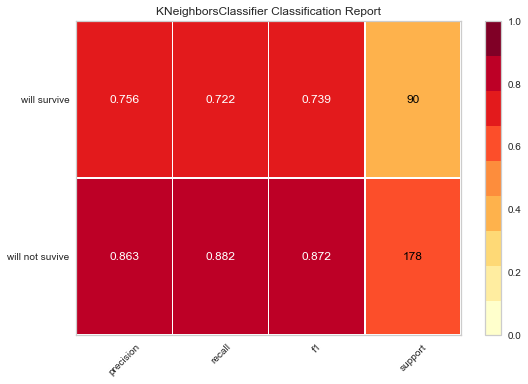

In [112]:
from yellowbrick.classifier import ClassificationReport

classes = ["will not suvive", "will survive"]

# Instantiate the classification model and visualizer
visualizer = ClassificationReport(KNNC, classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

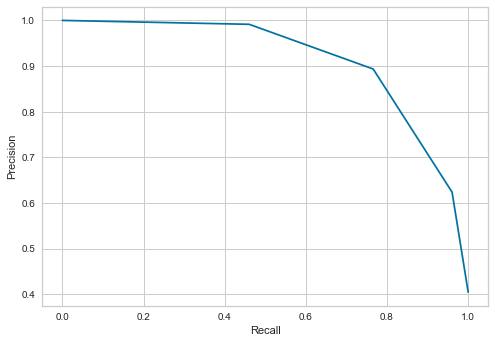

In [113]:
# Plotting the Precision-Recall curve
y_proba_train = KNNC.predict_proba(X_train)[:, 1]
p, r, t = metrics.precision_recall_curve(y_train, y_proba_train)

plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [114]:
titanic_submission = pd.DataFrame({'PassengerId':df_all_knn_hot.loc[test_index,:].index,
                                   'Survived':KNNC.predict(df_all_knn_hot.loc[test_index,:])})
titanic_submission.PassengerId = titanic_submission.PassengerId.astype(int)
titanic_submission.Survived = titanic_submission.Survived.astype(int)

# Overview how much suvived with k-nearest neighbor approach
titanic_submission.groupby('Survived').count()

,PassengerId
Survived,
0,269
1,149


In [115]:
titanic_submission.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,1
7,899,0
8,900,0
9,901,0


In [116]:
# Submission to a csv file for competition upload.
titanic_submission.to_csv("titanic_submission_knn_4.csv", index=False)